In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
from distgen.generator import Generator
from distgen.plot import plot_dist2d, plot_dist1d, plot_current_profile
from distgen.physical_constants import unit_registry
from matplotlib import pyplot as plt
import yaml

In [3]:
gen = Generator(verbose=0) 
units = {'x':'mm', 'y':'mm', 'px':'keV/c', 'py':'keV/c', 't':'ps', 'q':'pC', 'I':'A'}

# Radial Distributions
----------------------

# Radial Uniform
Typical usage is shown below for a uniformly filled ring:

Distribution format: gpt
Output file: rad.uniform.out.txt

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 10 pC.
   Number of macroparticles: 100000.
   Assuming cylindrical symmetry...
   r distribution: radial uniform
      min_r = 1 mm, max_r = 2 mm
   theta distribution:       min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Gaussian
      avg_t = 0.5 ns, sigma_t = 2.000 ns
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 276.857 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, sigma_pz = 276.857 eV/c
   Shifting avg_x = -2.95028E-05 mm -> 0 mm
   Scaling sigma_x = 1.11801 mm -> 1.11803 mm
   Shifting avg_y = -1.99416E-06 mm -> 0 mm
   Scaling sigma_y = 1.11803 mm -> 1.11803 mm
   Shifting avg_px = -0.0379046 eV/c -> 0 eV/c
   Scaling sigma_px = 276.852 eV/c -> 276.857 eV/c
   Shifting avg_py = -0.0437018 eV/c -> 0 eV/c
   Scaling sigma_py =

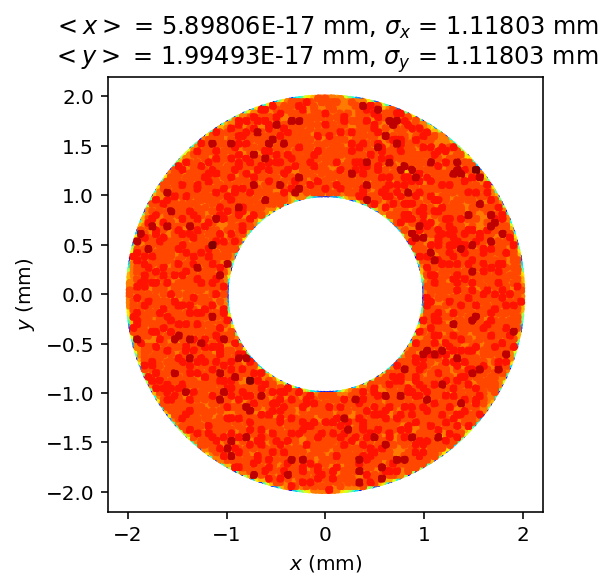

In [4]:
gen=Generator('data/rad.uniform.in.yaml',verbose=1)
beam = gen.beam()
print('\nYAML input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

plot_dist2d(beam, 'x', units['x'], 'y', units['y'], axis='equal', title_on=True);

# Radial Gaussian (with Truncation)

Here three examples are provided: a non-truncated Gaussian with $\sigma_{x,y}$ = 2 mm, followed by a truncated Gaussian using a truncation fraction to specify the maximal radial cut, followed by a truncated Gaussian using n_sigma_cutoff to specify the radial cut.

Example 1: canonical Gaussian with $\sigma_{x,y}$ = 2mm

In [8]:
# Radial gaussian distribution with sigma_xy 2 mm
gen=Generator('data/rad.gaussian.in.yaml',verbose=0)
beam = gen.beam()

print('\nYAML input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

# X-Y Plot
plot_dist2d(beam, 'x', units['x'], 'y', units['y'], axis='equal', title_on=True);

NameError: name 'minstr' is not defined

Example 2: Truncated Gaussian with a pinhole radius of 1 mm, clipped at 50% intensity

In [ ]:
# Truncated radial gaussian distribution with pihole diameter of 2 mm, gaussian clipped at 50% intensity
gen=Generator('data/rad.trunc.gaussian.in.yaml',verbose=0)
beam = gen.beam()

print('\nYAML input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

# X-Y Plot
plot_dist2d(beam, 'x', units['x'], 'y',units['y'], axis='equal', title_on=True);

Example 3: truncated Gaussian using underlying $\sigma_{x,y}$ = 2 mm and n_sigma_cutoff = 1

In [ ]:
# Radial gaussian distribution with cut using n_sigma_cutoff
gen=Generator('data/rad.gaussian.in.yaml',verbose=0)
gen.input['r_dist']['n_sigma_cutoff'] = 1
beam = gen.beam()

print("\nYAML input:")
print(yaml.dump({'r_dist':gen.input['r_dist']}))

# X-Y Plot
plot_dist2d(beam, 'x', units['x'], 'y', units['y'], axis='equal', title_on=True);

# Radial File

In [ ]:
# Radial distribution file: a radial gaussian with cuts in it
gen=Generator('data/rad.file.in.yaml', verbose=0)
beam = gen.beam()

print('\nYAML input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

# X-Y Plot
plot_dist2d(beam, 'x', units['x'], 'y', units['y'], axis='equal');

# Radial Tukey

In [ ]:
# Radial Tukey distribution
gen=Generator('data/tukey.beer.can.in.yaml',verbose=0)
beam = gen.beam()

print('\nYAML Input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

plot_dist2d(beam, 'x', units['x'], 'y', units['y'], axis='equal', title_on=True);

# Radial Super Gaussian
Example 1: hyper-Gaussian (uniform) limit (power $\rightarrow\infty$): $\sigma_{x,y}$ = 1 mm

In [ ]:
gen=Generator('data/SG.beer.can.in.yaml',verbose=0)
beam = gen.beam()

print("\nYAML Input:")
print(yaml.dump({'r_dist':gen.input['r_dist']}))

plot_dist2d(beam, 'x', units['x'], 'y', units['y'], axis='equal', title_on=True);

Example 2: Gaussian limit (power = 1): $\sigma_{x,y}$ = 1 mm

In [ ]:
gen=Generator('data/SG.beer.can.in.yaml',verbose=0)
gen['r_dist:alpha:value']=1.0
beam = gen.beam()

print('\nYAML Input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

plot_dist2d(beam, 'x', units['x'], 'y', units['y'], axis='equal', title_on=True);

Example 3: sub-Gaussian (power < 1): $\sigma_{x,y} = 1$ mm power = 0.5 

In [ ]:
gen=Generator('data/SG.beer.can.in.yaml',verbose=0)
del gen.input['r_dist']['alpha']

gen.input['r_dist']['p'] = {'value':0.5,'units':''}
beam = gen.beam()

print("\nYAML Input:")
print(yaml.dump({'r_dist':gen.input["r_dist"]}))

plot_dist2d(beam, 'x', units['x'], 'y', units['y'], axis="equal", title_on=True);

# 2D Distributions
------------------

# 2D File

In [ ]:
# 2D XY distribution: Lase Image Example
# Real laser spot image - using 1 million particles (takes a few secs)
gen=Generator('data/laser.image.in.yaml',verbose=0)
print(gen)
beam = gen.beam()

print('\nYAML input:')
print(yaml.dump({'xy_dist':gen.input['xy_dist']}))

# X-Y Plot
plot_dist2d(beam, 'x', units['x'], 'y', units['y'], nbins=100, axis='equal');

# 2D Image

If the user has an image dataset already loaded into python, they can directly pass this to Distgen using the Image2d class.  An example of how to use this in practice is given below:

In [ ]:
from distgen.tools import read_2d_file

xs, ys, Pxy, xstr, ystr = read_2d_file('data/laser.image.txt')

inputs={
    
    'n_particle': 200000,
    'total_charge': {'value':1, 'units':'pC'},
    'random_type': 'hammersley',
    'start': {
        'MTE':{'units': 'meV', 'value': 150}, 
        'type': 'cathode'
    },
    'xy_dist':{
        'type' : 'image2d',
        xstr:{'value': xs.magnitude, 'units':'mm'}, 
        ystr:{'value': ys.magnitude, 'units':'mm'}, 
        'P':Pxy
    }
}

gen=Generator(inputs,verbose=0)
beam = gen.beam()

# X-Y Plot
plot_dist2d(beam, 'x', units['x'], 'y', units['y'], nbins=100, axis='equal');

# 1D Distributions
-----------

# Uniform

In [ ]:
gen=Generator('data/x.uniform.y.file.t.gaussian.in.yaml',verbose=0)
beam = gen.beam()

print('\nYAML Input:')
print(yaml.dump({'x_dist':gen.input['x_dist']}))

plot_dist1d(beam, 'x', units['y'], nbins=100, title_on=True)

# 1D File

In [ ]:
gen=Generator('data/x.uniform.y.file.t.gaussian.in.yaml',verbose=0)
beam = gen.beam()

print('\nYAML Input:')
print(yaml.dump({'y_dist':gen.input['y_dist']}))
plot_dist1d(beam, 'y', units['y'], nbins=1000)

# Gaussian (with Truncation)

In [ ]:
gen=Generator('data/x.uniform.y.file.t.gaussian.in.yaml',verbose=0)
beam = gen.beam()

print('\nYAML Input:')
print(yaml.dump({'t_dist':gen.input['t_dist']}))

plot_dist1d(beam, 't', units['t'], nbins=1000)

# Tukey 

In [ ]:
# Tukey distribution
gen=Generator('data/tukey.beer.can.in.yaml', verbose=0)
beam = gen.beam()

print('\nYAML Input:')
print(yaml.dump({'t_dist':gen.input['t_dist']}))

plot_current_profile(beam, units['t'], units['I'], nbins=500, title_on=True)

In [ ]:
# Super Gaussian distribution
gen=Generator('data/SG.beer.can.in.yaml', verbose=0)
beam = gen.beam()

print('\nYAML Input:')
print(yaml.dump({'t_dist':gen.input['t_dist']}))

plot_current_profile(beam, units['t'], units['I'], title_on=True)

# Special Temporal Distributions
-------

# Pulse stacking temporal crystals

In [ ]:
gen=Generator('data/t.crystals.in.yaml',verbose=0)
beam = gen.beam()
print('\nYAML Input:')
print(yaml.dump({'t_dist':gen.input['t_dist']}))
plot_current_profile(beam, units['t'], units['I'] ,title_on=True)